In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("classif_onlinefoods.csv")

df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [27]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Drop missing values
df = df.dropna()

Missing values:
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


# No normalization coz classif dataset

In [28]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [29]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1


# Outlier analysis - Box plot didnt do coz classification focus on predicting categorical labels instead on Box plots are typically used for visualizing the distribution of numerical variables

# Linearity analysis - dont need coz Correlation matrices are primarily used to understand the linear relationships between numerical variables in a dataset


In [30]:
X = df.drop(columns=['Unnamed: 12'])
y = df['Unnamed: 12']

win_counts = y.value_counts()
print("Count of Wins:")
print(win_counts)


Count of Wins:
Unnamed: 12
1    301
0     87
Name: count, dtype: int64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
win_counts = y_train.value_counts()
print("Count of Wins:")
print(win_counts)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

win_counts = y_train_res.value_counts()
print("Count of Wins:")
print(win_counts)

Count of Wins:
Unnamed: 12
1    235
0     75
Name: count, dtype: int64
Count of Wins:
Unnamed: 12
1    235
0    235
Name: count, dtype: int64


In [36]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth = 1)
dt_classifier.fit(X_train_res, y_train_res)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("Accuracy : ", dt_accuracy)
print("F1 : ", dt_f1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))
tn, fp, fn, tp = confusion_matrix(y_test, dt_pred).ravel()
specificity = tn / (tn + fp) # Proportion of actual positive cases correctly identified by the model, indicating its ability to detect positive instances.
sensitivity = tp / (tp + fn) # Proportion of actual negative cases correctly identified by the model, indicating its ability to detect negative instances.
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)


Accuracy :  1.0
F1 :  1.0


In [37]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_res, y_train_res)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

print("Accuracy : ", nb_accuracy)
print("F1 : ", nb_f1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

Accuracy :  1.0
F1 :  1.0


In [38]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_res, y_train_res)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print("Accuracy : ", svm_accuracy)
print("F1 : ", svm_f1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

Accuracy :  0.8461538461538461
F1 :  0.9166666666666666


In [41]:
voting_classifier = VotingClassifier(estimators=[('dt', dt_classifier), ('nb', nb_classifier), ('svm', svm_classifier)], voting='hard')
voting_classifier.fit(X_train_res, y_train_res)
voting_pred = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)
print("Accuracy : ", svm_accuracy)
print("F1 : ", svm_f1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, voting_pred))
tn, fp, fn, tp = confusion_matrix(y_test, voting_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)


Accuracy :  0.8461538461538461
F1 :  0.9166666666666666


In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print("Accuracy : ", rf_accuracy)
print("F1 : ", rf_f1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

Accuracy :  1.0
F1 :  1.0


In [42]:
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'Voting Classifier', 'Random Forest']
accuracy_scores = [dt_accuracy, nb_accuracy, svm_accuracy, voting_accuracy, rf_accuracy]
f1_scores = [dt_f1, nb_f1, svm_f1, voting_f1, rf_f1]

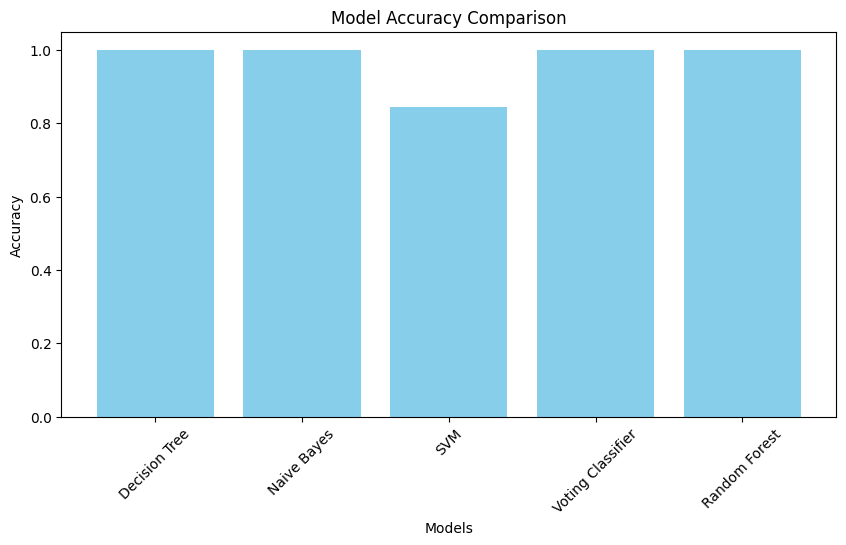

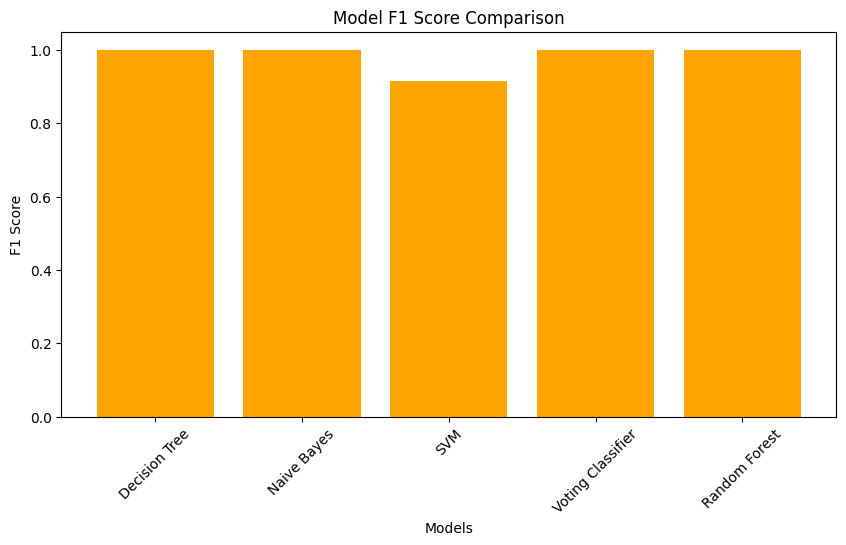

In [43]:
# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 5))
plt.bar(models, f1_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45)
plt.show()